<a href="https://colab.research.google.com/github/14Cristhian/CalendarioPython/blob/main/TensorClasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import io
from PIL import Image
import cv2


In [ ]:

(x_train, y_train), (x_test, y_test) =mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

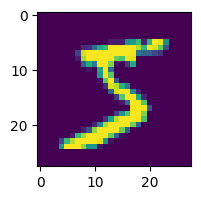

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[0])

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
x_train = x_train/255

In [ ]:
x_test = x_test/255

In [ ]:
y_train.shape

(60000,)

In [ ]:
class_name = ['0','1','2','3','4','5','6','7','8','9']

In [ ]:
len(class_name)

10

In [ ]:
class_name[y_train[0]]

'5'

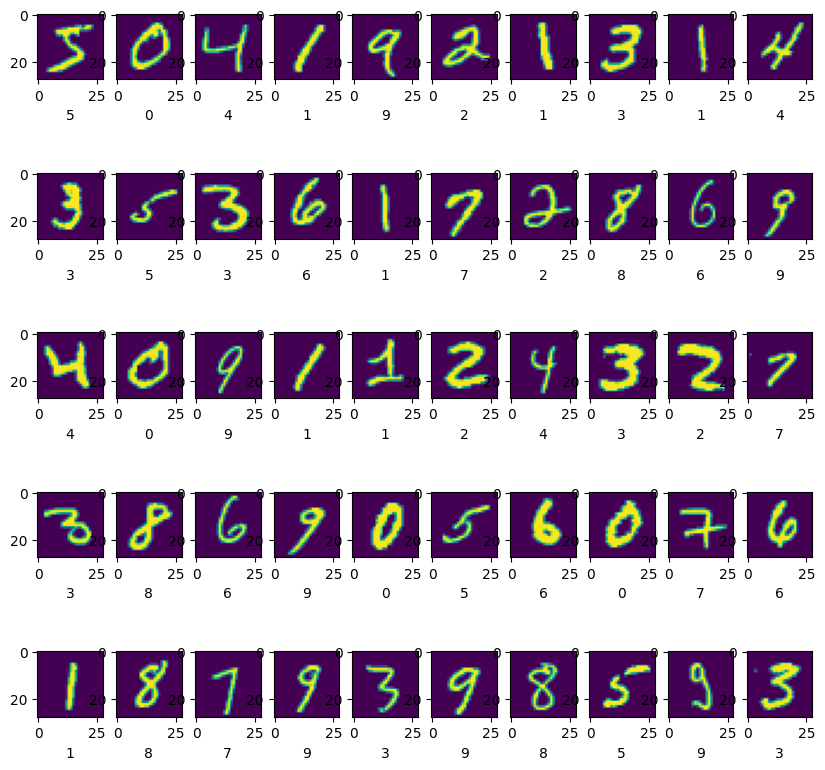

In [ ]:
plt.figure(figsize=(10,10))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.imshow(x_train[i])
  plt.xlabel(class_name[y_train[i]])

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 50)                39250     
                                                                 
 dense_11 (Dense)            (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [ ]:
28*28

784

In [ ]:
model.compile(optimizer="SGD",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6864 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3505 - accuracy: 0.9019
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3030 - accuracy: 0.9141
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9234
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2507 - accuracy: 0.9291
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2329 - accuracy: 0.9341
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2182 - accuracy: 0.9389
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2060 - accuracy: 0.9426
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1952 - accuracy: 0.9456
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.185

In [ ]:
test_loss, test_acc= model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1806 - accuracy: 0.9479


In [ ]:
test_acc

0.9478999972343445

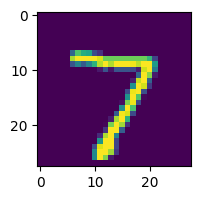

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(x_test[0])

In [ ]:
x_test[0].shape

(28, 28)

In [ ]:
clasficiacion = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [ ]:
clasficiacion[0].shape

(10,)

In [ ]:
classname_index = np.argmax(clasficiacion[0])


In [ ]:
class_name[classname_index]

'7'

In [ ]:
img = Image.open(('descargar.png'))


In [ ]:
img_array= np.array(img)

In [ ]:
img_array.shape

(258, 195)

In [ ]:
gray_img = cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY)

error: ignored

In [ ]:
gray_img.shape

In [ ]:
gray_fix = cv2.resize(gray_img,dsize=(28,28),interpolation=cv2.INTER_CUBIC)

In [ ]:
gray_fix.shape

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(gray_fix)

In [ ]:
gray_fix = 255-gray_fix

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(gray_fix)

In [ ]:
gray_fix=gray_fix/255

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(gray_fix)

In [ ]:
x= np.zeros((1,28,28))

In [ ]:
x[0] = np.array(gray_fix)

In [ ]:
clasificacion = model.predict(x)

In [ ]:
clasificacion[0]

In [ ]:
classname_index = np.argmax(clasificacion[0])


In [ ]:
class_name[classname_index]